Customer Segmentation

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import where
from numpy import unique

from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

from statistics import mode 

In [17]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [18]:
data.dropna(inplace=True)
data.drop_duplicates(keep='first', inplace = True)
data.Geography = data.Geography.map({'France': 0, 'Germany': 1, 'Spain': 2})
data.Gender = data.Gender.map({'Female': 0, 'Male': 1})
data.shape

(9996, 14)

In [19]:
features = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
new_df= data[features]

KMeans

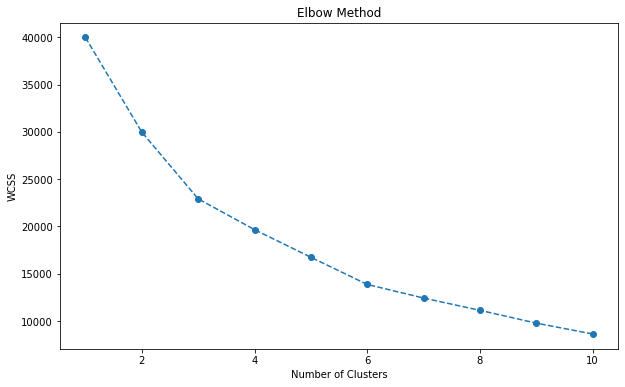

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [30]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred
frame


,Tenure,NumOfProducts,HasCrCard,IsActiveMember,cluster
0,2,1,1.0,1.0,0
1,1,1,0.0,1.0,1
2,8,3,1.0,0.0,2
3,1,2,0.0,0.0,1
5,8,2,1.0,0.0,2
...,...,...,...,...,...
9995,5,2,1.0,0.0,2
9996,10,1,1.0,1.0,0
9997,7,1,0.0,1.0,1
9998,3,2,1.0,0.0,2


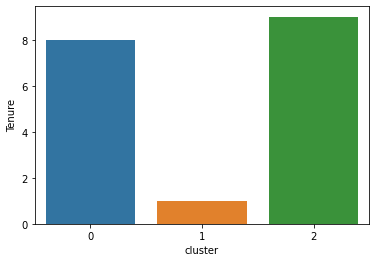

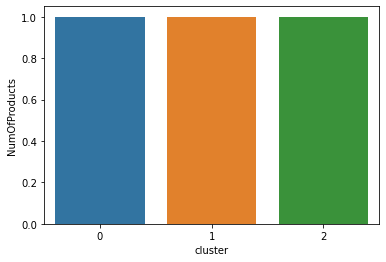

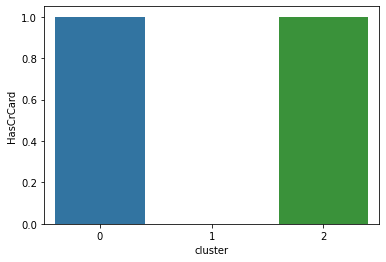

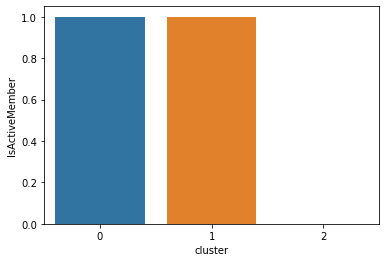

In [31]:
mode = frame.groupby(['cluster'], as_index=False).agg(lambda x: x.mode().iloc[0])
for i in features:
    sns.barplot(x='cluster',y=str(i),data=mode)
    plt.show()


In [32]:
kmeans = KMeans( n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred
frame

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,cluster
0,2,1,1.0,1.0,5
1,1,1,0.0,1.0,2
2,8,3,1.0,0.0,3
3,1,2,0.0,0.0,4
5,8,2,1.0,0.0,3
...,...,...,...,...,...
9995,5,2,1.0,0.0,3
9996,10,1,1.0,1.0,5
9997,7,1,0.0,1.0,2
9998,3,2,1.0,0.0,3


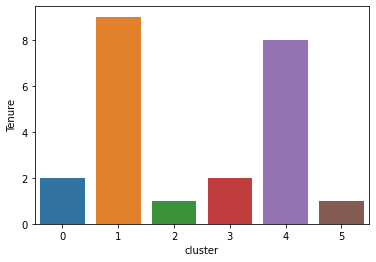

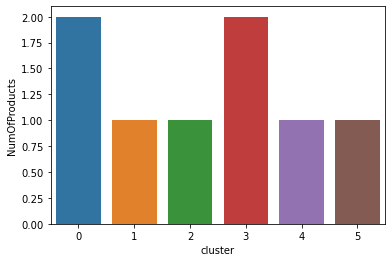

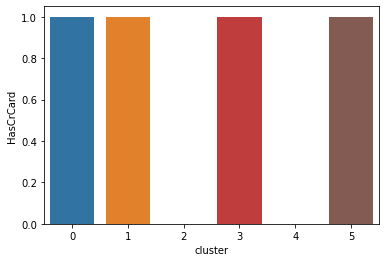

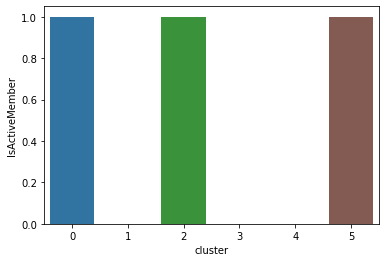

In [33]:
mode = frame.groupby(['cluster'], as_index=False).agg(lambda x: x.mode().iloc[0])
for i in features:
    sns.barplot(x='cluster',y=str(i),data=mode)
    plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

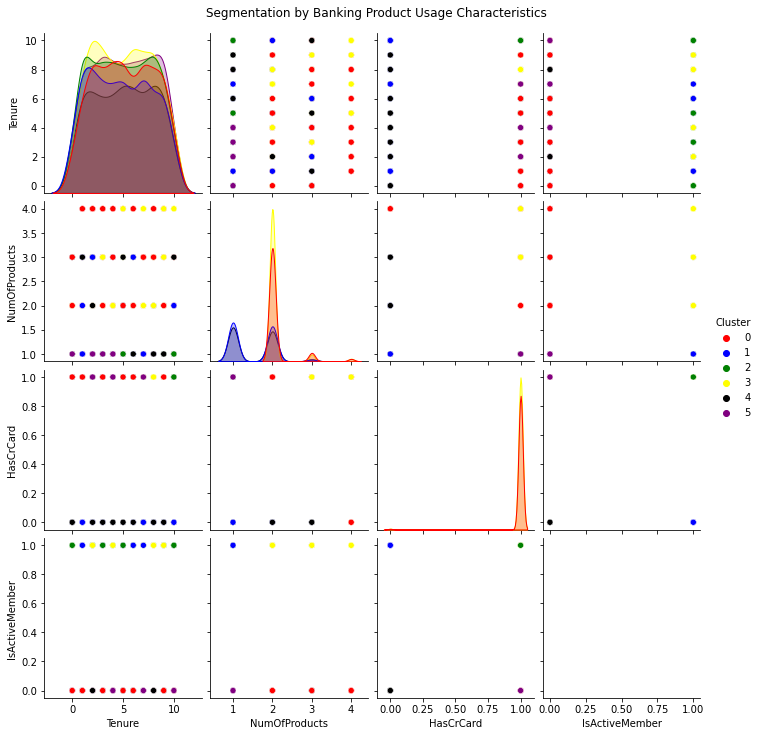

In [34]:
n_clusters = 6

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
color1= 'red'
color2= 'blue'
color3 = 'green'
color4 = 'yellow'
color5= 'black'
color6 = 'purple'
# Visualize the clusters
sns.pairplot(data=data, vars=features, hue ='Cluster', palette=[color1,color2,color3, color4, color5,color6])
plt.suptitle('Segmentation by Banking Product Usage Characteristics', y=1.02)
plt.show()


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


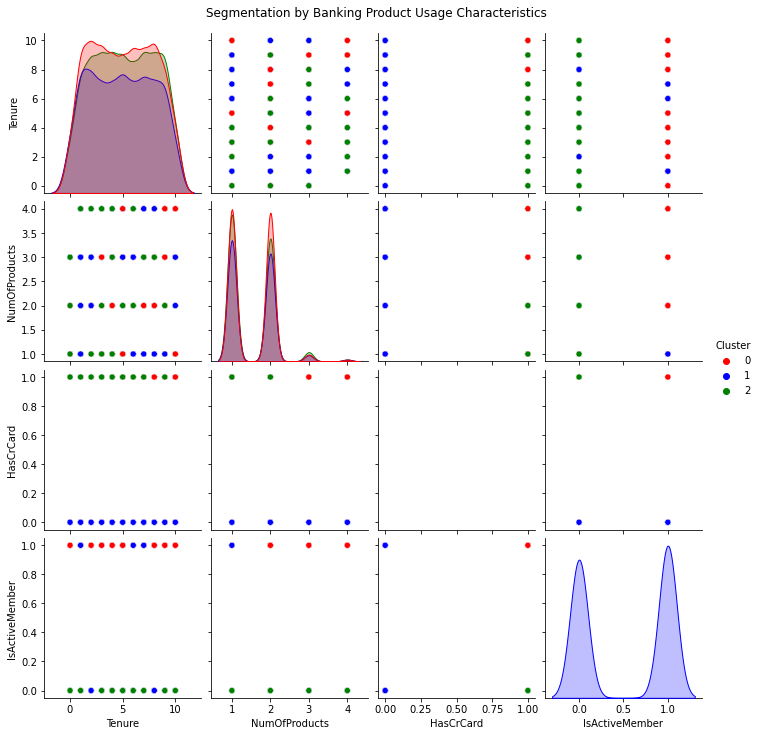

In [35]:
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
color1= 'red'
color2= 'blue'
color3 = 'green'

# Visualize the clusters
sns.pairplot(data=data, vars=features, hue ='Cluster', palette=[color1,color2,color3])
plt.suptitle('Segmentation by Banking Product Usage Characteristics', y=1.02)
plt.show()

OPTICS

In [36]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# define the model
model = OPTICS(min_samples=20, xi=.05, min_cluster_size=.05)
# fit model and predict clusters
yhat = model.fit_predict(data_scaled)
# retrieve unique clusters
clusters = unique(yhat)

frame = pd.DataFrame(new_df)
frame['cluster'] = yhat
frame

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_optics.py:803: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


,Tenure,NumOfProducts,HasCrCard,IsActiveMember,cluster
0,2,1,1.0,1.0,0
1,1,1,0.0,1.0,4
2,8,3,1.0,0.0,-1
3,1,2,0.0,0.0,6
5,8,2,1.0,0.0,2
...,...,...,...,...,...
9995,5,2,1.0,0.0,2
9996,10,1,1.0,1.0,0
9997,7,1,0.0,1.0,4
9998,3,2,1.0,0.0,2


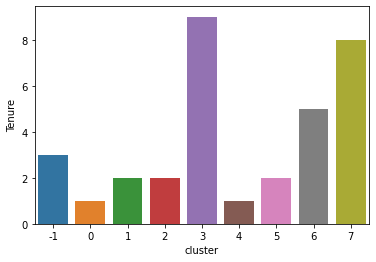

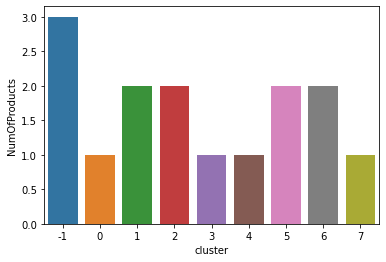

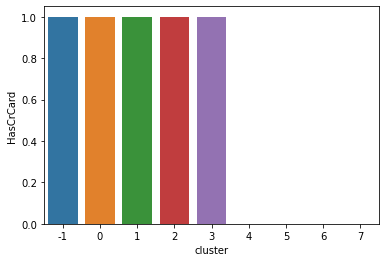

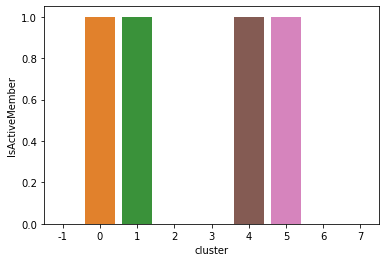

In [37]:
mode = frame.groupby(['cluster'], as_index=False).agg(lambda x: x.mode().iloc[0])
for i in features:
    sns.barplot(x='cluster',y=str(i),data=mode)
    plt.show()

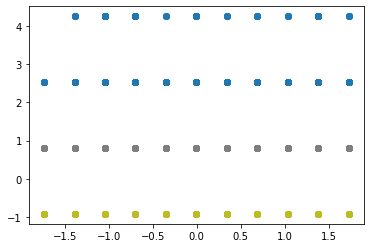

In [38]:
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(data_scaled[row_ix, 0], data_scaled[row_ix, 1])
# show the plot
plt.show()

MeanShift

In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


# define the model
model = MeanShift(bandwidth=1.6)
# fit model and predict clusters
yhat = model.fit_predict(data_scaled)
# retrieve unique clusters
clusters = unique(yhat)

frame = pd.DataFrame(new_df)
frame['cluster'] = yhat
frame

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,cluster
0,2,1,1.0,1.0,1
1,1,1,0.0,1.0,4
2,8,3,1.0,0.0,8
3,1,2,0.0,0.0,7
5,8,2,1.0,0.0,3
...,...,...,...,...,...
9995,5,2,1.0,0.0,3
9996,10,1,1.0,1.0,1
9997,7,1,0.0,1.0,4
9998,3,2,1.0,0.0,3


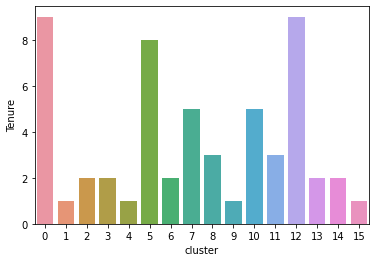

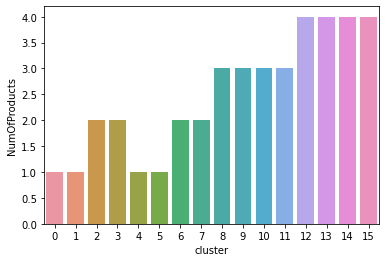

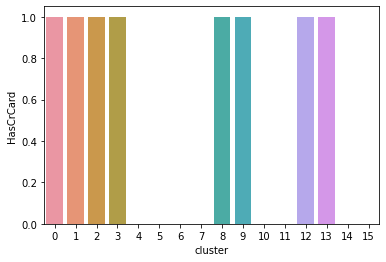

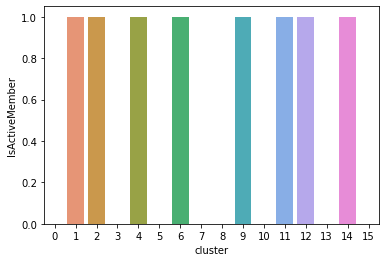

In [40]:
mode = frame.groupby(['cluster'], as_index=False).agg(lambda x: x.mode().iloc[0])
for i in features:
    sns.barplot(x='cluster',y=str(i),data=mode)
    plt.show()

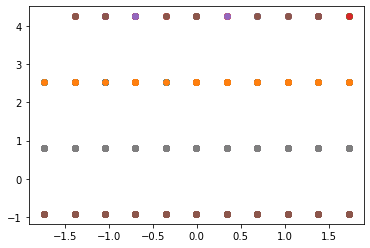

In [41]:
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(data_scaled[row_ix, 0], data_scaled[row_ix, 1])
# show the plot
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

graph_cut_costs = []
for i in range(2, 11):  # Spectral clustering typically works with 2 or more clusters
    spectral = SpectralClustering(n_clusters=i, random_state=42, affinity='nearest_neighbors', n_neighbors=10)  # Adjust parameters as needed
    labels = spectral.fit_predict(data_scaled)
    
    # Construct connectivity matrix
    connectivity_matrix = kneighbors_graph(data_scaled, n_neighbors=10, include_self=False)
    
    # Calculate graph cut cost
    graph_cut_cost = np.sum(connectivity_matrix.toarray()[labels[:, np.newaxis] != labels]) / 2
    
    graph_cut_costs.append(graph_cut_cost)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), graph_cut_costs, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Graph Cut Cost')
plt.title('Elbow Method for Spectral Clustering')
plt.show()

In [20]:
# define the model
model = SpectralClustering(n_clusters=7)
# fit model and predict clusters
yhat = model.fit_predict(data_scaled)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(data_scaled[row_ix, 0], data_scaled[row_ix, 1])
# show the plot
plt.show()